<a href="https://colab.research.google.com/github/sebasruggero/python/blob/main/An%C3%A1lisis_de_patrones_de_puntos_Catamarca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![img](https://www.argentina.gob.ar/sites/default/files/min_transporte.png)
# Análisis de patrones de punto - Ciudad San Fernando del Valle de Catamarca
## Subsecretaria de Proyectos Estratégicos y Desarrollo Tecnológico

[Visualizacion PowerBi](https://app.powerbi.com/view?r=eyJrIjoiNzhiNGI3ZTAtZjBiMS00ZGU4LWE0ODctZDRkNjNhMTIxYzkzIiwidCI6IjI4MzQzN2IwLWFhNWMtNGMyZi05NjZjLWRmNDA5ZjdhMWM4ZSIsImMiOjR9&pageName=ReportSection2514b0e19aba8989a290)     

<img src="https://cdn-dhhph.nitrocdn.com/YwrWfrMMnPrQoiMcCnngShsqFHLItupA/assets/static/optimized/rev-c79781d/wp-content/uploads/2016/08/maxresdefaultreduced.jpg " width="100" float="rigth"> 

Lic. Sebastian Ruggero







In [ ]:
%%time 
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install Pysal
!pip install pysal
# Install Contextily
!pip install contextily
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
% pip install geopandas
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive


In [57]:
##  Importamos las librerias
import numpy as np
import pandas as pd
import geopandas as gpd
import pysal 
import seaborn as sns
import contextily as cx
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from shapely.geometry import Point

In [38]:
## Importamos la data
url = 'https://raw.githubusercontent.com/sebasruggero/analisis_transporte_catamarca/main/cata.csv'
df = pd.read_csv(url)
df.head(1)

,FECHATRX,DIA,ANIO,DIASEMANA,HORA,MODO,NROTARJETA,SECUENCIA_TARJETA,ID_COMBINACION,CONTRATO,...,ENTIDAD,IDLINEA,LINEA,MUNICIPIO,DESC_RAMAL,ESTACION,ID_SERVICIO,DIRECTION,LONGITUDE,LATITUDE
0,13/10/2021 23:58:39,13,2021,Miercoles,23,COLE,1816487930,694,621,Atributo A,...,25 DE AGOSTO SRL,1048,LINEA 201,CATAMARCA,201A,NaN,16438.0,1,-65.77627,-28.47596


In [22]:
## Cambiamos el tipo de dato a Datetime 
dataframe['FECHATRX'] = pd.to_datetime(dataframe['FECHATRX'],errors='coerce') 

In [26]:
### Armamos los puntos del dataframe original
df['geometry'] = df.apply(lambda x: Point(float(x.LONGITUDE), float(x.LATITUDE)), axis=1)



/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


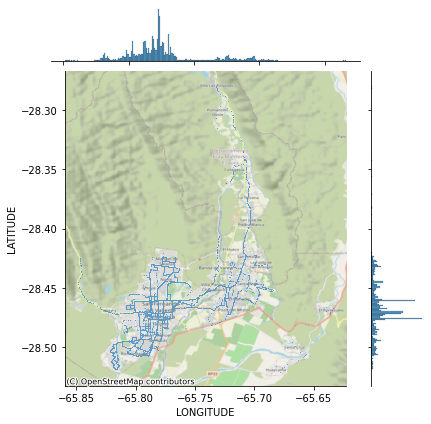

In [92]:
joint_axes = sns.jointplot(
    x='LONGITUDE', y='LATITUDE', data=df, s=0.5
)
cx.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=cx.providers.OpenStreetMap.CH
);

/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


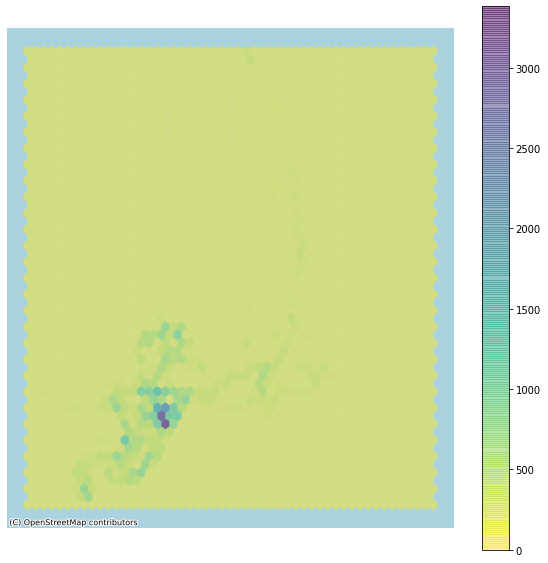

In [93]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(10, 10))
# Generate and add hexbin with 50 hexagons in each 
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    df["LONGITUDE"], 
    df["LATITUDE"],
    gridsize=50, 
    linewidths=0,
    alpha=0.5, 
    cmap='viridis_r'
)
# Add basemap
cx.add_basemap(
    ax, 
    source=cx.providers.OpenStreetMap.CH
)
# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


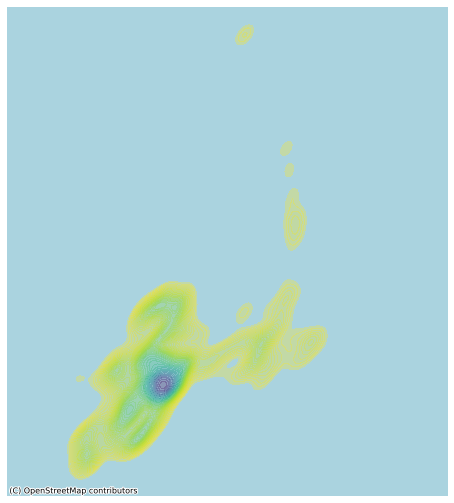

In [94]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
sns.kdeplot(
    df["LONGITUDE"], 
    df["LATITUDE"],
    n_levels=50, 
    shade=True,
    alpha=0.30, 
    cmap='viridis_r'
)
# Add basemap
cx.add_basemap(
    ax,
    source=cx.providers.OpenStreetMap.CH
)
# Remove axes
ax.set_axis_off()

In [95]:
from pointpats import centrography

In [98]:
mean_center = centrography.mean_center(df[['LONGITUDE', 'LATITUDE']])
med_center = centrography.euclidean_median(df[['LONGITUDE', 'LATITUDE']])

/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


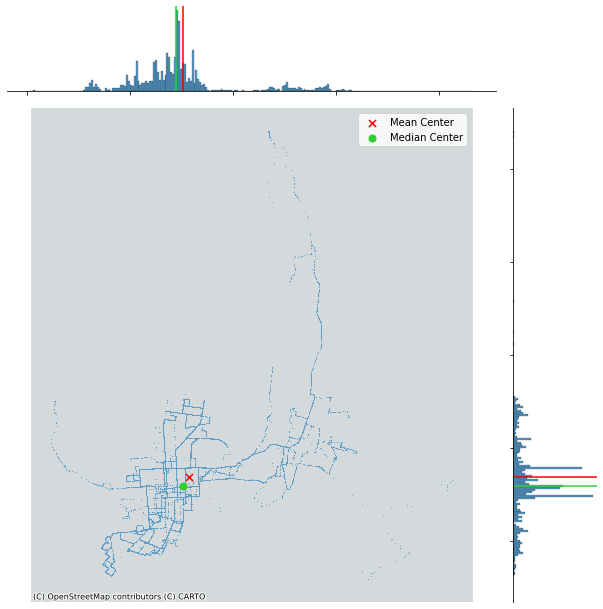

In [101]:
# Generate scatter plot
joint_axes = sns.jointplot(
    x='LONGITUDE', y='LATITUDE', data=df, s=0.75, height=9
)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')
# Add median point and marginal lines
joint_axes.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')
# Legend
joint_axes.ax_joint.legend()
# Add basemap
cx.add_basemap(
    joint_axes.ax_joint, 
    source=cx.providers.CartoDB.Positron
)
# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()

# Dispersion¶

In [104]:
centrography.std_distance(df[['LONGITUDE','LATITUDE']])

0.03918849918559484

In [106]:
major, minor, rotation = centrography.ellipse(df[['LONGITUDE','LATITUDE']])

/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


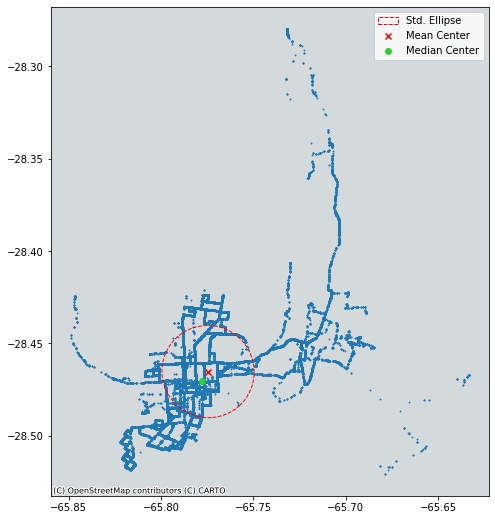

In [109]:
from matplotlib.patches import Ellipse

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot photograph points
ax.scatter(df['LONGITUDE'], df['LATITUDE'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = np.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle='--',
                  label='Std. Ellipse')
ax.add_patch(ellipse)

ax.legend()
# Display
# Add basemap
cx.add_basemap(
    ax, 
    source=cx.providers.CartoDB.Positron
)
plt.show()

